In [1]:
import pandas as pd
import numpy as np
import xlrd
import os
import psutil
import sys
np.set_printoptions(threshold=np.inf)

pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.use_inf_as_na = True

path = 'C:/Users/delightb/Desktop/Final_Project/Senior-Project/Pickle'
####   = pd.read_pickle(os.path.join(path,'abvHouse.pkl'))

#### 'W BOISE' : 
'NORTH CENTRAL BENCH', 'WEST BOISE', 'WEST BOISE FREEWAY CORRIDOR'

#### 'BOISE BENCH' : 
'CENTRAL BOISE BENCH', 'NORTH CENTRAL BENCH',  'BOISE BENCH FREEWAY CORRIDOR', 'PARK & UNIVERSITY WATERFRONT'

#### 'W BOISE-MERIDIAN' : 
'WEST BOISE', 'NORTHEAST MERIDIAN', 'WEST BOISE FREEWAY CORRIDOR', 'NORTH CENTRAL BENCH','GARDEN CITY CHINDEN CORRIDOR', 'MERIDIAN FREEWAY CORRIDOR'

#### 'NORTH BOISE' : 
'OLD NORTH BOISE', 'BOISE FOOTHILLS', 'NEW NORTH BOISE','DOWNTOWN BOISE', 'WARM SPRINGS','PARK & UNIVERSITY WATERFRONT'

#### 'SE BOISE' : 
'NEW SOUTHEAST BOISE', 'SOUTHEAST BOISE INFILL','EAST BOISE WATERFRONT', 'OREGON TRAIL', 'PARK & UNIVERSITY WATERFRONT', 'SOUTH BOISE DESERT'

#### 'NW BOISE-GARDEN CITY' : 
'NEW NORTH BOISE', 'NORTHWEST BOISE', 'GARDEN CITY WATERFRONT', 'BOISE FOOTHILLS','GARDEN CITY CHINDEN CORRIDOR']

#### 'NE BOISE' : 
'BOISE FOOTHILLS', 'WARM SPRINGS', 'EAST BOISE WATERFRONT', 'BARBER & HARRIS RANCH'

#### 'SW BOISE' : 
'WEST BOISE FREEWAY CORRIDOR', 'AIRPORT', 'BOISE BENCH FREEWAY CORRIDOR', 'SOUTH BOISE DESERT','SOUTHWEST BOISE'

#### 'SW BOISE-MERIDIAN': 
'WEST BOISE FREEWAY CORRIDOR', 'MERIDIAN FREEWAY CORRIDOR', 'SOUTH MERIDIAN', 'SOUTHWEST BOISE'


## Build percent change dataframe
Removed all 2000-01-01 because there is no change to observe
Removed TAV_Ch <2 because that data was the change of the TAV from a land parcel to a land parcel with a house, which is not the intended measurement.

In [67]:


house_df = pd.read_pickle(os.path.join(path,'abvHouse.pkl'))
jobs_df = pd.read_pickle(os.path.join(path,'jobShift.pkl'))
yearTotals = pd.read_pickle(os.path.join(path,'yrTotalChange.pkl'))

df = house_df

df = pd.merge(df, jobs_df, on = 'Year', how = 'left')
df = pd.merge(df, yearTotals, on = 'Year', how = 'left')

df = df[df['Year'] != '2000-01-01']
df = df[df['Age']> 1]
df = df[pd.notnull(df['Area'])]
df = df[df['TAV_Ch']<2]

df['Bathroom_Count'] = df['Bathroom_Count'].astype(int)
df['TAV_Ch'] = df['TAV_Ch'].round(7)

df = df.drop(columns = ['All Occupations'])

# getting list of columns, choosing from jobs on to the end
col_list = df.columns.get_values()
col_list = col_list.tolist()
col_list = colList[1:]

#rounding columns to 5 decimal places
for col in colList:
    df[col] = df[col].round(5)
      
    
    
df.to_pickle(os.path.join(path,'AN_Build.pkl'))    
    
df.head()

#df
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

# this is the best way for finding everything
# pd.options.mode.use_inf_as_na = True
# pd.isna(df['TAV_Ch']).sum()
# df.isnull().sum()


,Parcel,Year,Group,Neighborhood,Area,Age,Bedroom_Count,Bathroom_Count,TAV,TAV_Ch,...,Transportation And Material Moving Occupations,"(10000.0, 40000.0]","(40000.0, 70000.0]","(70000.0, 100000.0]","(100000.0, 150000.0]","(150000.0, 200000.0]","(200000.0, 300000.0]",Total_House_Change,Total_Pop_Change,Total_Emp_Change
53806,R0017650020,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,3,4,4,206700.0000,0.3082,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53807,R0017650030,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,2,4,4,206700.0000,0.2467,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53808,R0017650040,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,2,4,4,206700.0000,0.2467,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53809,R0017650050,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,3,4,4,206700.0000,0.3336,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53810,R0027000008,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,64,1,1,145600.0000,0.1278,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334


## Trim the TAV_Ch 

In [69]:
def trim(df):
    dfQ1 = df['TAV_Ch'].quantile(0.25)
    dfQ3 = df['TAV_Ch'].quantile(0.75)
    df_iqr = dfQ3 - dfQ1
    iqrMax =dfQ3 + (1.5*df_iqr)
    iqrMin = dfQ1 - (1.5*df_iqr)
    df_trim = df[(df['TAV_Ch']<iqrMax) & (df['TAV_Ch'] > iqrMin)]
    
    return df_trim

In [70]:
df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))

df = trim(df)

df.to_pickle(os.path.join(path, 'pct_all_trimmed.pkl'))

## Checking to verify normal distribution

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010). SPSS for Windows Step by Step: A Simple Guide and Reference, 17.0 update (10a ed.) Boston: Pearson.

### Before trim, doesn't pass kurtosis after trim it does pass


 mu = 0.05 and sigma = 0.09



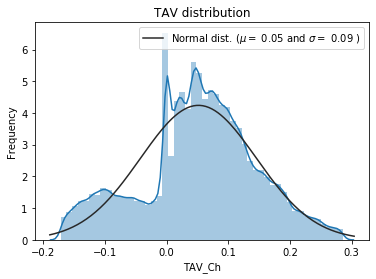

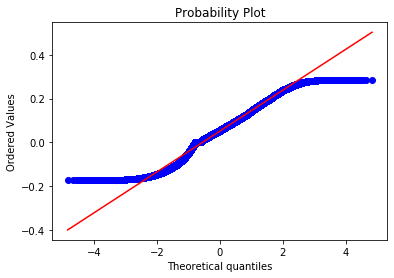

Skewness: -0.182506
Kurtosis: -0.197106


In [73]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_pickle(os.path.join(path,'pct_all_trimmed.pkl'))
sns.distplot(df['TAV_Ch'], fit = norm);

(mu, sigma) = norm.fit(df['TAV_Ch'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TAV distribution')

fig = plt.figure()
res = stats.probplot(df['TAV_Ch'], plot=plt)
plt.show()

print("Skewness: %f" % df['TAV_Ch'].skew())
print("Kurtosis: %f" % df['TAV_Ch'].kurt())


 mu = 0.05 and sigma = 0.12



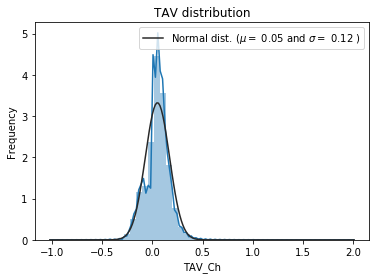

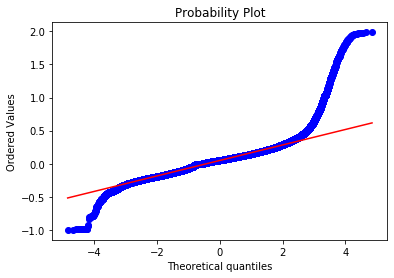

Skewness: 0.766987
Kurtosis: 9.215968


In [72]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))
sns.distplot(df['TAV_Ch'], fit = norm);

(mu, sigma) = norm.fit(df['TAV_Ch'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TAV distribution')

fig = plt.figure()
res = stats.probplot(df['TAV_Ch'], plot=plt)
plt.show()

print("Skewness: %f" % df['TAV_Ch'].skew())
print("Kurtosis: %f" % df['TAV_Ch'].kurt())

In [ ]:
df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))
df.describe()

In [ ]:
# area_list = ['NW BOISE-GARDEN CITY']
# df = pd.read_pickle('temp.pkl')
# df = df[df['Area'] == area_list[0]]

# df = trim(df)
# #df.head()
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt =sns.distplot(df['TAV'])
# plt

# #df.describe()

## Find the correlation of the features to TAV

In [ ]:
# area_list = ['NW BOISE-GARDEN CITY','BOISE BENCH','SE BOISE','NORTH BOISE',
#              'NE BOISE', 'W BOISE','SW BOISE-MERIDIAN','W BOISE-MERIDIAN','SW BOISE']
area_list = ['W BOISE']

df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))
df= df.drop(columns = ['Parcel', 'Year','Group', 'Neighborhood','Age','Bedroom_Count','Bathroom_Count'])
df.to_pickle('temp.pkl')

In [ ]:
df = pd.read_pickle('temp.pkl')
coefComp('W BOISE',df)

## Prep for linear regression

In [ ]:
df = pd.read_pickle(os.path.join(path, 'pct_all_trimmed.pkl'))
df = df.drop(columns= ['Parcel', 'Group','Neighborhood','TAV'])

df.head()

### Do one-hot-encoding

In [74]:
#found this to clean up the nan and inf problems

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [76]:
df = pd.read_pickle(os.path.join(path, 'pct_all_trimmed.pkl'))
df

,Parcel,Year,Group,Neighborhood,Area,Age,Bedroom_Count,Bathroom_Count,TAV,TAV_Ch,...,Transportation And Material Moving Occupations,"(10000.0, 40000.0]","(40000.0, 70000.0]","(70000.0, 100000.0]","(100000.0, 150000.0]","(150000.0, 200000.0]","(200000.0, 300000.0]",Total_House_Change,Total_Pop_Change,Total_Emp_Change
53807,R0017650030,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,2,4,4,206700.0000,0.2467,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53808,R0017650040,2001-01-01,AARON PARK SUB,NORTH CENTRAL BENCH,W BOISE,2,4,4,206700.0000,0.2467,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53810,R0027000008,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,64,1,1,145600.0000,0.1278,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53811,R0027000013,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,64,4,1,97900.0000,0.1491,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53812,R0027000018,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,64,2,0,122200.0000,0.1453,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53813,R0027000025,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,51,2,0,54000.0000,0.1638,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53814,R0027000030,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,51,1,0,68500.0000,0.1493,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53815,R0027000035,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,60,2,2,92100.0000,0.1413,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53816,R0027000040,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,52,4,2,187500.0000,0.1201,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334
53817,R0027000047,2001-01-01,ABBS SUB,CENTRAL BOISE BENCH,BOISE BENCH,53,4,1,111700.0000,0.1386,...,-0.0456,-0.0948,0.3027,0.2183,0.0000,0.0000,0.0000,0.0348,0.0364,-0.0334


In [79]:
df = pd.read_pickle(os.path.join(path, 'pct_all_trimmed.pkl'))
df = df.drop(columns= ['Parcel', 'Group','Neighborhood'])
df = df[df['Area'] != 0]
#df = clean_dataset(df)

df = pd.concat([df,pd.get_dummies(df['Area'], prefix='Area')],axis=1)
df.drop(['Area'],axis=1, inplace=True)

df.to_pickle(os.path.join(path,'oneHotEncode.pkl'))
df.head()

OSError: [Errno 28] No space left on device

In [ ]:
# from sklearn.linear_model import LinearRegression

# df = pd.read_pickle(os.path.join(path,'oneHotEncode.pkl'))
# df = df[df['Year'] != '2018-01-01']
# df = df.drop(columns = ['Year'])
# df = clean_dataset(df)

# lm_df = df.copy()

# feature_cols = df.columns.get_values()
# feature_cols = feature_cols.tolist()
# feature_cols.remove('TAV_Ch')


# y = lm_df.TAV_Ch
# X = lm_df[feature_cols]

# lm = LinearRegression()
# lm.fit(X, y)

# Keep working from here

## Build Area Correlation Coefficient
use k= 11 because TAV_Ch to TAV_Ch = 1
this is trimmed

In [ ]:
def coefComp(area, df):
    k = 11
    df_Fun = df.copy()
    df_Fun = df_Fun[df_Fun['Area'] == area]
    df_Fun = trim(df_Fun)
    corrmat = df_Fun.corr()
    cols = corrmat.nlargest(k, 'TAV_Ch')['TAV_Ch']
    temp = pd.DataFrame(cols)

    return temp

In [ ]:
df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))
df= df.drop(columns = ['Parcel', 'Year','Group', 'Neighborhood','Age','Bedroom_Count','Bathroom_Count'])
temp = list(df.columns)


temp = list(df.columns)
aBoise = pd.DataFrame(temp)
aBoise = aBoise.rename(columns = {0 : 'index'})


temp = list(df.columns)
aBoise = pd.DataFrame(temp)
aBoise = aBoise.rename(columns = {0 : 'index'})

df1 = coefComp('NW BOISE-GARDEN CITY', df)
df1 = df1.reset_index()
aBoise = pd.merge(aBoise,df1, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'NW_Boise_GC'})

df2 = coefComp('BOISE BENCH', df)
df2 = df2.reset_index()
aBoise = pd.merge(aBoise,df2, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'B_Bench'})

df3 = coefComp('SE BOISE', df)
df3 = df3.reset_index()
aBoise = pd.merge(aBoise,df3, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'SE_Boise'})

df4 = coefComp('NORTH BOISE', df)
df4 = df4.reset_index()
aBoise = pd.merge(aBoise,df4, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'N_Boise'})

df5 = coefComp('NE BOISE', df)
df5 = df5.reset_index()
aBoise = pd.merge(aBoise,df5, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'NE_Boise'})

df6 = coefComp('W BOISE', df)
df6 = df6.reset_index()
aBoise = pd.merge(aBoise,df6, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'W_Boise'})

df7 = coefComp('SW BOISE-MERIDIAN', df)
df7 = df7.reset_index()
aBoise = pd.merge(aBoise,df7, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'SW_Boise_M'})

df8 = coefComp('W BOISE-MERIDIAN', df)
df8 = df8.reset_index()
aBoise = pd.merge(aBoise,df8, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'W_Boise_M'})

df9 = coefComp('SW BOISE', df)
df9 = df9.reset_index()
aBoise = pd.merge(aBoise,df9, on = 'index', how = 'left')
aBoise = aBoise.rename(columns = {'TAV_Ch' : 'SW_Boise'})


aBoise.to_pickle(os.path.join(path,'Trim-A-Coeff-compare.pkl'))